Part 1: Data Exploration [4 points]
1. Load the Titanic dataset into a pandas DataFrame. [1]
2. Explore the first few rows of the dataset to understand its structure. [1]
3. Calculate and visualise the basic statistics (mean, median, etc) for the numeric columns [1
correct numeric + 1]

In [56]:
from google.colab import files
uploaded = files.upload()

# Load the Titanic dataset into a pandas DataFrame
import pandas as pd
df = pd.read_csv("titanic.csv")

Saving titanic.csv to titanic (2).csv


In [ ]:
# Explore the first few rows of the dataset to understand its structure
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  Parch  \
0                            Braund, Mr. Owen Harris    male  22.0      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      0   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      0   
4                           Allen, Mr. William Henry    male  35.0      0   

      Fare Embarked  FamilySize  
0   7.2500        S           4  
1  71.2833        C           2  
2   7.9250        S           4  
3  53.1000        S           2  
4   8.0500        S           4  


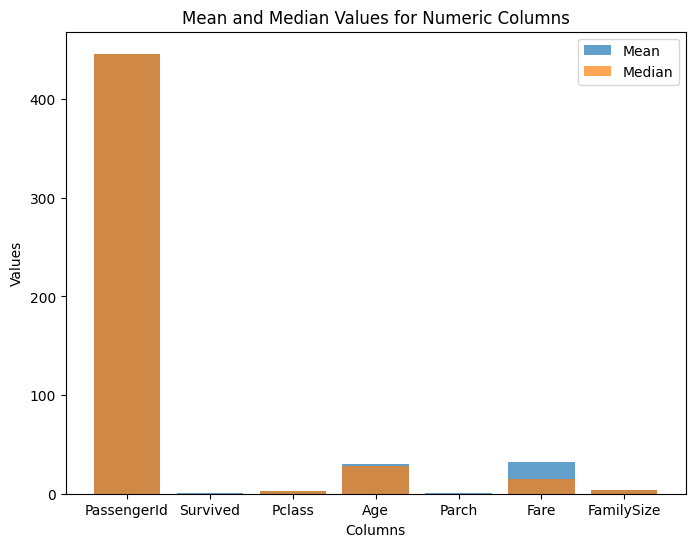

In [ ]:
# Calculate and visualise the basic statistics (mean, median, etc) for the numeric columns
import matplotlib.pyplot as plt

# Calculate basic statistics for numeric columns
numeric_stats = df.describe()

# Visualize the statistics
plt.figure(figsize=(8, 6))

plt.bar(numeric_stats.columns, numeric_stats.loc['mean'], label='Mean', alpha=0.7)
plt.bar(numeric_stats.columns, numeric_stats.loc['50%'], label='Median', alpha=0.7)

plt.title('Mean and Median Values for Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.legend()
plt.show()


Part 2: Visualization [11 points]
1. Create a bar chart to show the distribution of passengers by class (1st, 2nd, 3rd). [1]
2. Create a histogram to visualise the age distribution of passengers. [1]
3. Calculate and visualise the survival rate of passengers. Create a pie chart to
represent this information. [1]
4. Create a bar chart to show the count of passengers by gender. [1]
5. Create a stacked bar chart to visualise the survival rate by gender. Explain any
gender-based differences in survival. [2]
6. Create a count plot (bar chart) to show the number of passengers who embarked
from each location (S, C, Q). What do you notice about the embarkation points? [2]
7. Create a box plot to visualise the distribution of family sizes among passengers. [1]
8. Create a scatter plot to visualise the relationship between fare and age. Do
passengers who paid higher fares tend to be older? [2]

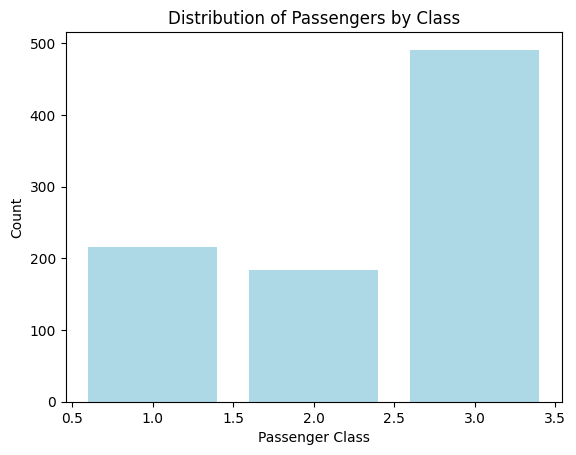

In [ ]:
# Create a bar chart to show the distribution of passengers by class (1st, 2nd, 3rd).
import matplotlib.pyplot as plt

class_distribution = df['Pclass'].value_counts()

plt.bar(class_distribution.index, class_distribution.values, color = 'lightblue')

plt.title('Distribution of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

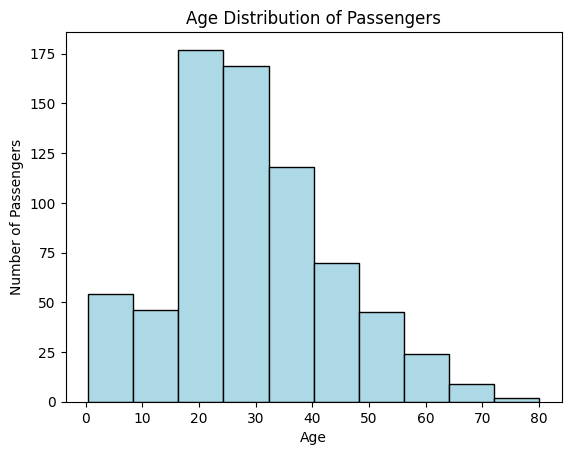

In [ ]:
# Create a histogram to visualise the age distribution of passengers.
plt.hist(df['Age'].dropna(), bins=10, color ='lightblue', edgecolor='black')

plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

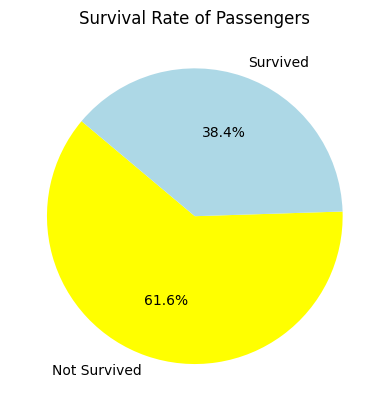

In [58]:
# Calculate and visualise the survival rate of passengers. Create a pie chart to represent this information.
# Calculate survival rate
survival_rate = df['Survived'].value_counts(normalize=True) * 100

# Create a pie chart
plt.pie(survival_rate, labels=['Not Survived', 'Survived'],
        autopct='%1.1f%%', startangle=140, colors=['yellow', 'lightblue'])

plt.title('Survival Rate of Passengers')
plt.show()

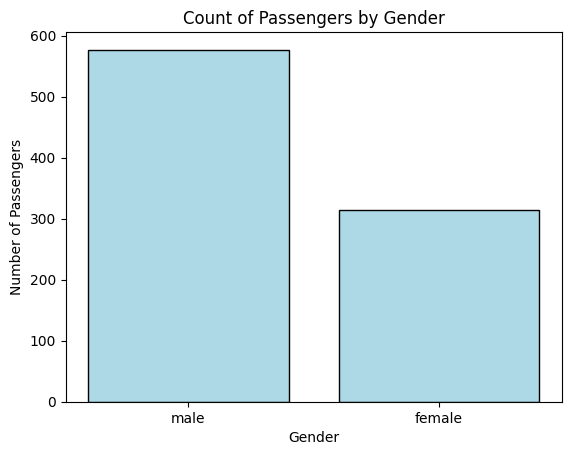

In [59]:
# Create a bar chart to show the count of passengers by gender.
# Count the number of passengers by gender
gender_count = df['Sex'].value_counts()

# Create a bar chart
plt.bar(gender_count.index, gender_count.values, color=['lightblue'], edgecolor = 'black')

plt.title('Count of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()

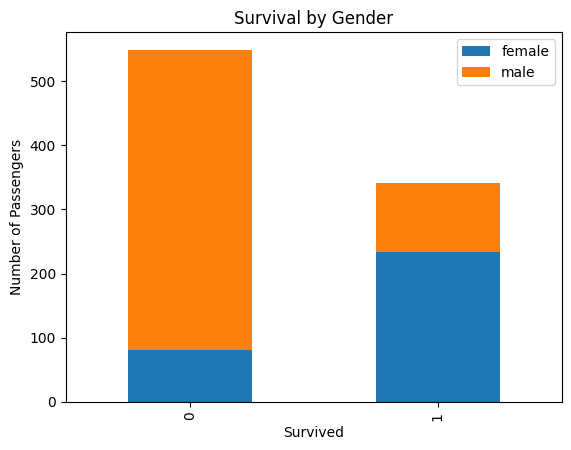

In [60]:
# Create a stacked bar chart to visualise the survival rate by gender. Explain any gender-based differences in survival
# Create a crosstab of survival by gender
survivalBy_gender = pd.crosstab(df['Survived'], df['Sex'])

# Create a stacked bar chart
survivalBy_gender.plot(kind='bar', stacked=True)

plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

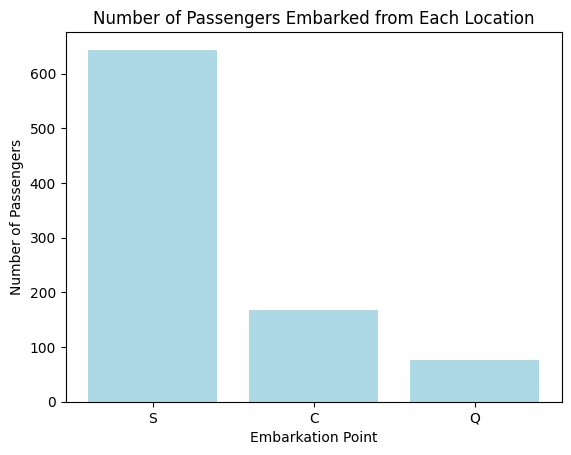

In [61]:
# Create a count plot (bar chart) to show the number of passengers who embarked from each location (S, C, Q). What do you notice about the embarkation points?
# Create a count plot for embarkation points
embarkation_count = df['Embarked'].value_counts()

# Create a bar chart
plt.bar(embarkation_count.index, embarkation_count.values, color = 'lightblue')

plt.title('Number of Passengers Embarked from Each Location')
plt.xlabel('Embarkation Point')
plt.ylabel('Number of Passengers')
plt.show()

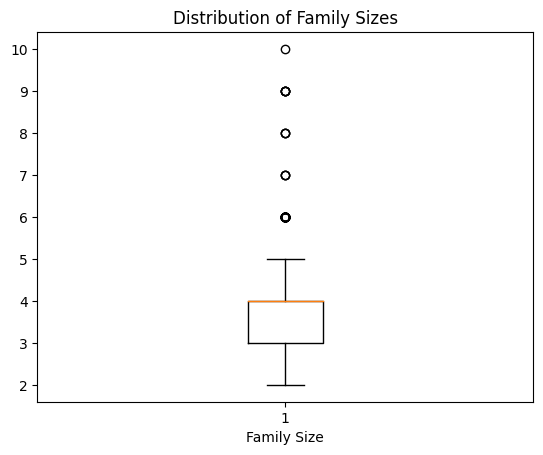

In [62]:
# Create a box plot to visualise the distribution of family sizes among passengers.
import seaborn as sns

# Create a new column 'FamilySize'
# Calculate family size
df['FamilySize'] = df['Parch'] + df['Pclass']+ 1

# Create a box plot
plt.boxplot(df['FamilySize'])

plt.title('Distribution of Family Sizes')
plt.xlabel('Family Size')
plt.show()

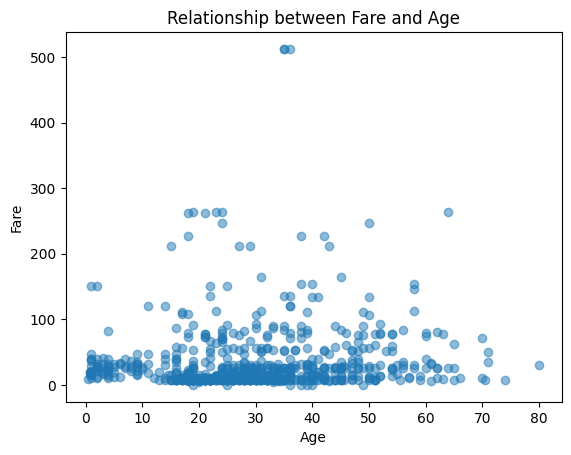

In [64]:
# Create a scatter plot to visualise the relationship between fare and age. Do passengers who paid higher fares tend to be older?
# Create a scatter plot
plt.scatter(df['Age'], df['Fare'], alpha=0.5)

plt.title('Relationship between Fare and Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

Question 2: Sentiment Analysis [25 marks]
Dataset: Corona_NLP.csv
Part 1: Data Loading [2 points]
1. Load the dataset Corona_NLP.csv [1]
2. Show the last 10 rows of the dataframe [1]

In [65]:
from google.colab import files
uploaded = files.upload()

# Load the dataset Corona_NLP.csv
import pandas as pd
df = pd.read_csv("Corona_NLP.csv")


Saving Corona_NLP.csv to Corona_NLP (2).csv


In [66]:
# Show the last 10 rows of the dataframe
print(df.tail(10))

       UserName ScreenName             Location     TweetAt  \
44948    3789.0      48741             Pakistan  16-03-2020   
44949    3790.0      48742      California, USA  16-03-2020   
44950    3791.0      48743     Cincinnati, Ohio  16-03-2020   
44951    3792.0      48744      Washington D.C.  16-03-2020   
44952    3793.0      48745      Washington D.C.  16-03-2020   
44953    3794.0      48746            Israel ??  16-03-2020   
44954    3795.0      48747       Farmington, NM  16-03-2020   
44955    3796.0      48748        Haverford, PA  16-03-2020   
44956    3797.0      48749                  NaN  16-03-2020   
44957    3798.0      48750  Arlington, Virginia  16-03-2020   

                                           OriginalTweet           Sentiment  
44948  You never eaten the pigs cat dog or food from ...             Neutral  
44949  @calebmealer @thebradfordfile @realDonaldTrump...  Extremely Positive  
44950  Even though the Law Library is closed, ALL sub...            P

Part 2: Manipulation and Visualisations [8 points]
The independent attributes that convey information are:
1. Location
2. Time (TweetedAt)
3. Text (OriginalTweet)

It should be noted that although we will not be using the TweetedAt and Location columns in our
analysis, we will still conduct a minor exploratory data analysis (EDA) on these columns.

1. Check if there are any duplicate rows. If there are any, remove the duplicates. [1]
2. (a) In the Location column, find unique values and their corresponding frequencies
(number of times they appear) [1]
(b) Sort the values in descending order. [1]
(c) Using a bar chart, visualise your results for the top 20 locations. [1]
3. You will see that Sentiment can take 5 values: "Extremely Negative", "Negative",
"Neutral", "Positive", "Extremely Positive". Using an appropriate color palette and an
appropriate type of graph, visualise how Sentiment is distributed. [2]
4. Change the labels of part of the data, combining "Extremely Negative" and "Negative"
into “Negative” and "Positive" and "Extremely Positive" into positive. [2]

In [67]:
# Check if there are any duplicate rows. If there are any, remove the duplicates.
#By assuming df as DataFrame
df = df.drop_duplicates()

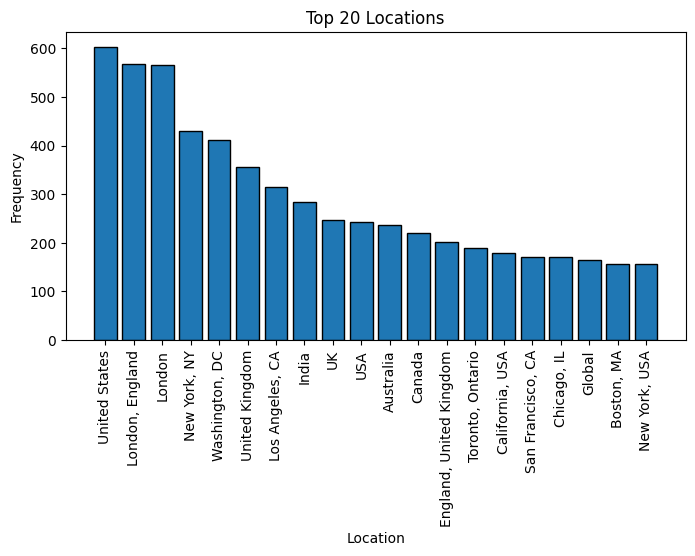

In [69]:
# 2(a) In the Location column, find unique values and their corresponding frequencies (number of times they appear)
location_frequencies = df['Location'].value_counts()

# 2(b) Sort the values in descending order.
location_frequencies = location_frequencies.sort_values(ascending=False)

# 2(c) Using a bar chart, visualise your results for the top 20 locations.
import matplotlib.pyplot as plt

top20_locations = location_frequencies.head(20)

plt.figure(figsize=(8, 4))
plt.title('Top 20 Locations')
plt.bar(top20_locations.index, top20_locations.values, edgecolor = 'black')
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

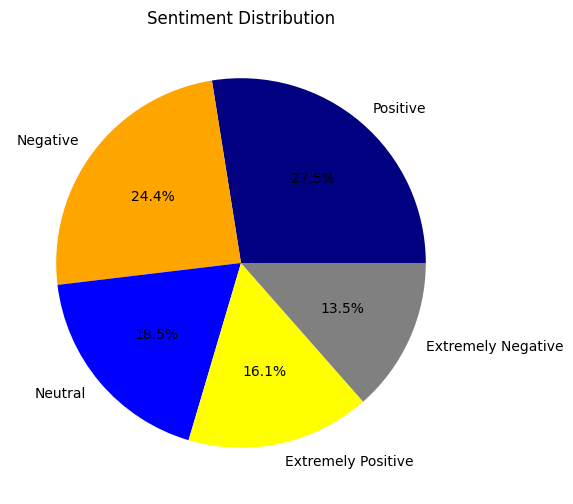

In [70]:
# You will see that Sentiment can take 5 values: "Extremely Negative", "Negative", "Neutral", "Positive", "Extremely Positive". Using an appropriate color palette and an
#appropriate type of graph, visualise how Sentiment is distributed.
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.title('Sentiment Distribution')
plt.pie(sentiment_counts, labels=sentiment_counts.index,
        autopct='%1.1f%%', colors = ['navy', 'orange', 'blue', 'yellow', 'grey'])
plt.show()

In [71]:
# Change the labels of part of the data, combining "Extremely Negative" and "Negative" into “Negative” and "Positive" and "Extremely Positive" into positive.

df['Sentiment'] = df['Sentiment'].replace({'Extremely Negative': 'Negative', 'Negative': 'Negative',
                                           'Extremely Positive': 'Positive', 'Positive': 'Positive'})

Part 3 - Cleaning [8 points]

Perform the following text cleaning steps. I suggest that you do subparts 1, 2 and 3 in the same
function:
1. Remove hyperlinks [1]
2. Remove hashtags [1]
3. Replace \n and \r with an empty space [2]
4. Using TweetTokenizer in nltk.tokenize, perform tokenization. Sample code is provided.
You can use another function if you wish. [1]
5. In the same function, remove stopwords and punctuation signs. [1]
6. Perform stemming using PorterStemmer in nltk.stem [1]
7. Apply these functions to the dataset and visualise the first 5 rows. [1]

In [87]:
# 1.Remove hyperlinks, 2.Remove hashtags, 3.Replace \n and \r with an empty space

import re

def cleaning(tweet):
    # Remove hyperlinks
    tweet = re.sub(r'http\S+', '', tweet)

    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)

    # Replace \n and \r with an empty space
    tweet = tweet.replace('\n', ' ').replace('\r', ' ')

    return tweet


In [88]:
# 4.Using TweetTokenizer in nltk.tokenize, perform tokenization. Sample code is provided. You can use another function if you wish.
# 5.In the same function, remove stopwords and punctuation signs.

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

# subpart 4 and 5
def tokenizing(tweet):

    stopwords_english = stopwords.words('english')

    # 1 mark
    tokenizer = TweetTokenizer()  # create an instance of the tokenizer
    new_tweet = tokenizer.tokenize(tweet)  # tokenize the tweet

    clean_tweet=[]

    # 1 mark
    for element in new_tweet: # Going through every word in tokens list
        # our goal is to remove punctuation and stopwords
        if element not in stopwords_english and element.isalnum():  # Check if element is not a stopword and is alphanumeric
            clean_tweet.append(element)  # If so, add it to clean_tweet

    return clean_tweet


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [89]:
# 6.Perform stemming using PorterStemmer in nltk.stem
# Subpart 6
def stemming(tweet):
    # Instantiate stemming class
    stemmer = PorterStemmer()  # create an instance of a Porter stem

    # Create an empty list to store the stems
    stemmed_tweets = []

    for word in tweet:
        stem_word =  stemmer.stem(word)  # stemming word
        stemmed_tweets.append(stem_word)  # append to the list

    return stemmed_tweets


In [90]:
import pandas as pd

# Apply cleaning function

cleaned_tweets = [cleaning(str(tweet)) for tweet in df['OriginalTweet']]

# Apply tokenizing function
tokenized_tweets = [tokenizing(tweet) for tweet in cleaned_tweets]

# Apply stemming function
stemmed_tweets = [stemming(tweet) for tweet in tokenized_tweets]

# Create a DataFrame for visualization
data = {'Original Tweet': df['OriginalTweet'], 'Cleaned Tweet': cleaned_tweets, 'Tokenized Tweet': tokenized_tweets, 'Stemmed Tweet': stemmed_tweets}
df = pd.DataFrame(data)

# Visualize the first 5 rows
print(df.head())

                                      Original Tweet  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   
1  advice Talk to your neighbours family to excha...   
2  Coronavirus Australia: Woolworths to give elde...   
3  My food stock is not the only one which is emp...   
4  Me, ready to go at supermarket during the #COV...   

                                       Cleaned Tweet  \
0         @MeNyrbie @Phil_Gahan @Chrisitv  and  and    
1  advice Talk to your neighbours family to excha...   
2  Coronavirus Australia: Woolworths to give elde...   
3  My food stock is not the only one which is emp...   
4  Me, ready to go at supermarket during the  out...   

                                     Tokenized Tweet  \
0                                                 []   
1  [advice, Talk, neighbours, family, exchange, p...   
2  [Coronavirus, Australia, Woolworths, give, eld...   
3  [My, food, stock, one, empty, PLEASE, panic, T...   
4  [Me, ready, go, supermarket, outbreak, Not,

Part 4 - Model development [7]
1. Create a tf-idf vectorizer and fit the function. [1]
2. Keeping only the columns Tweet and Sentiment, split your dataset into training (80%)
and test (20%) sets. [1]
3. Build a logistic regression model and fit the data. [3]
4. What is the accuracy of the model? [1]
5. Generate a classification report. [1]
6. BONUS: Comment on the metrics. [0]

Question 3: Statistics [10 points]
Dataset: q3_data.csv
1. What is the mean, mode, median and interquartile range for x1 and x2? [4]
2. What is the correlation coefficient between x1 and x2? [1]
3. Fit a regression line and visualise the data points. [2]
4. Comment on the correlation coefficient, the regression line and your scatter plot. [3]

In [117]:
from google.colab import files
uploaded = files.upload()

# What is the mean, mode, median and interquartile range for x1 and x2?
import pandas as pd
from scipy import stats
data = pd.read_csv('q3_data.csv')

# mean
mean_x1 = data['x1'].mean()
mean_x2 = data['x2'].mean()
import pandas as pd

# mode
def calculate_mode(data):
    counts = {}
    for value in data:
        counts[value] = counts.get(value, 0) + 1
    mode = max(counts, key=counts.get)
    return mode
mode_x1 = calculate_mode(data['x1'])
mode_x2 = calculate_mode(data['x2'])

# median
median_x1 = data['x1'].median()
median_x2 = data['x2'].median()

# interquartile range
iqr_x1 = data['x1'].quantile(0.75) - data['x1'].quantile(0.25)
iqr_x2 = data['x2'].quantile(0.75) - data['x2'].quantile(0.25)

# display the results
print(f"Mean of x1: {mean_x1}")
print(f"Mean of x2: {mean_x2}")
print(f"Mode of x1: {mode_x1}")
print(f"Mode of x2: {mode_x2}")
print(f"Median of x1: {median_x1}")
print(f"Median of x2: {median_x2}")
print(f"IQR of x1: {iqr_x1}")
print(f"IQR of x2: {iqr_x2}")

Saving q3_data.csv to q3_data.csv
Mean of x1: 49.790812994760515
Mean of x2: -50.17388733310123
Mode of x1: 27.44067519636624
Mode of x2: 58.35021615618314
Median of x1: 50.25686162982244
Median of x2: -50.357779095568446
IQR of x1: 45.9107590452148
IQR of x2: 201.3400268403476


In [118]:
# What is the correlation coefficient between x1 and x2?
# correlation coefficient
corr_coefficient = data['x1'].corr(data['x2'])
print(f"Correlation coefficient between x1 and x2: {corr_coefficient}")

Correlation coefficient between x1 and x2: -0.8318445482811824


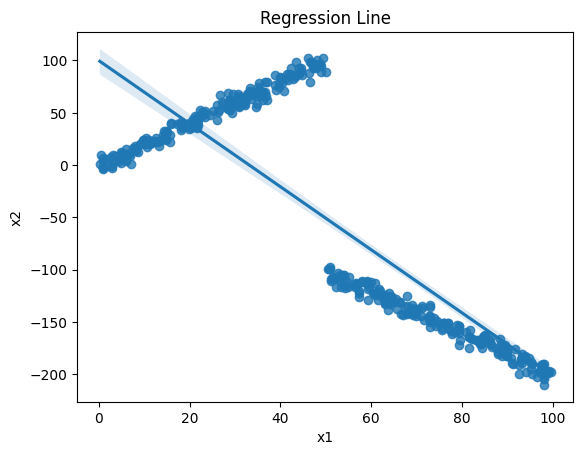

In [119]:
# Fit a regression line and visualise the data points.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("q3_data.csv")

# Fit a regression line
sns.regplot(x='x1', y='x2', data=df)

# visualise the data points and regression line
plt.title('Regression Line')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Comment on the correlation coefficient, the regression line and your scatter plot scatter plot. [3]

 **Correlation Coefficient:** So, this number basically tells us how much and in what direction x1 is connected in a linear way. It's between -1 and 1, meaning 1 is a perfect positive relationship, -1 is a perfect negative relationship, and 0 is no linear relationship at all. The closer the absolute value is to 1, the stronger the correlation.

**Regression Line:** So, think of the regression line as the perfect fit through all those data points. It's like a roadmap to guess the value of one thing (x2) based on another thing (x1). In this situation, it shows how x1 and x2 are linked up.

**Scatter Plot:** So, this graph is like a visual story of how x1 and x2 are getting along. Each point on the plot is like a pair of values (x1, x2).If the points tend to cluster around the regression line, it's a sign that there's a strong linear relationship between them.

